In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import random
np.random.seed(10)
random.seed(10)

# Load the dataset

In [3]:
df = pds.read_csv('./iris_dataset.csv', sep=";") # load a pandas dataframe from csv
del df["species"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Compute the sse for different nb. of clusters $k$ 


In [4]:
sse = []
Ks = range(1, 15)
for k in Ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=k) # create a KMeans object
    km.fit(df)
    #distance.append(np.sqrt(km.inertia_))
    sse.append(km.inertia_)

Text(0,0.5,'SSE')

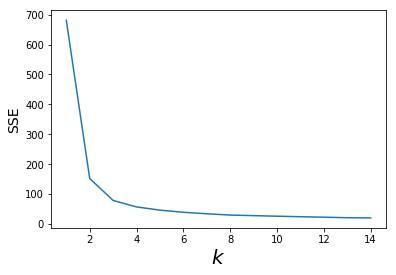

In [5]:
plt.plot(Ks,sse)
plt.xlabel("$k$",fontsize=20)
plt.ylabel("SSE",fontsize=14)

# Compute the silhouette coefficient for different nb. of clusters $k$

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
silhouette_coef = []
Ks = range(2, 30)
for k in Ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=k) # create a KMeans object
    km.fit(df)
    labels = km.predict(df)
    silhouette_coef.append(silhouette_score(df, labels, metric='euclidean', sample_size=None))

Text(0,0.5,'Silhouette Coef.')

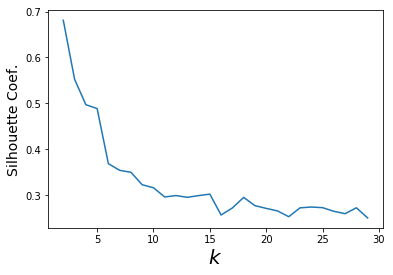

In [8]:
plt.plot(Ks,silhouette_coef)
plt.xlabel("$k$",fontsize=20)
plt.ylabel("Silhouette Coef.",fontsize=14)